In [1]:
# http://arohatgi.info/WebPlotDigitizer/app/
# http://arxiv.org/abs/1107.4367

In [2]:
%pylab inline

rc('text', usetex=True, fontsize=28)

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = loadtxt('Westphal-BX154_kulas_data.csv', delimiter=',')

x = data[:,0]/(1+2.5954) #redshift z = 2.5954
y = data[:,1]

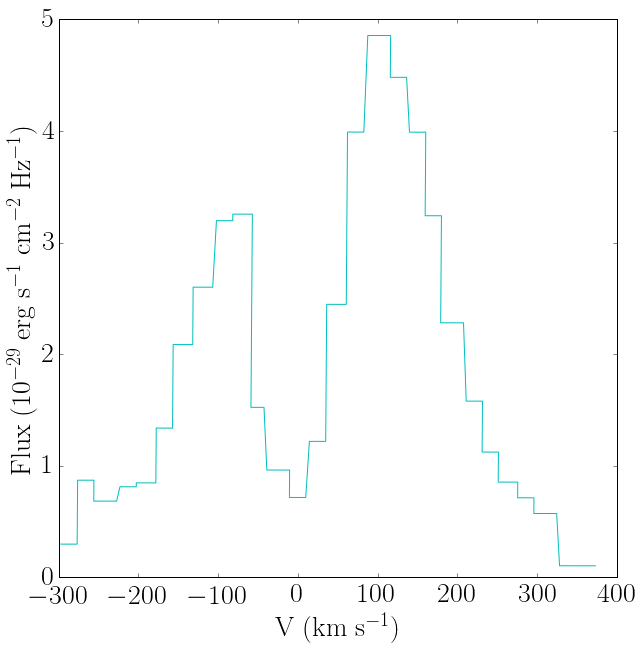

In [4]:
f = figure(figsize = (10,10))
plot(x,y,c='c')
xlabel('$\mathrm{V\;(km\;s^{-1})}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('observation_v.png')

In [5]:
v_th = -12.8
x_x = flipud(x/v_th)
y_x = flipud(y)

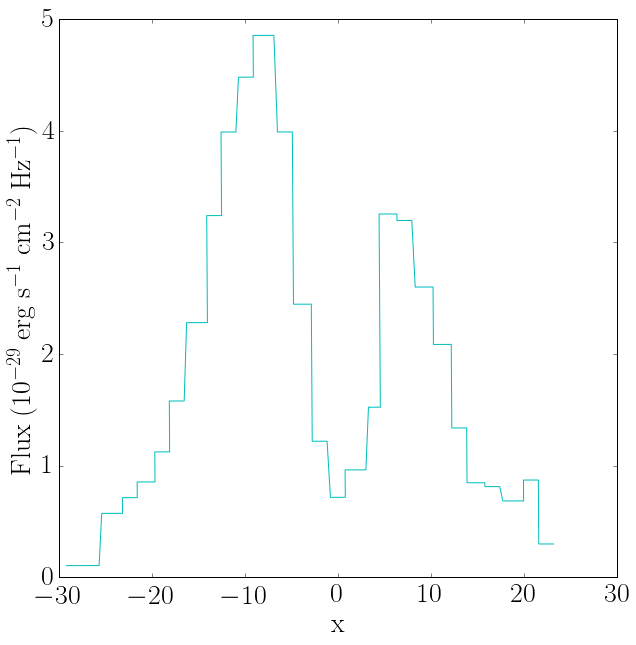

In [6]:
f = figure(figsize = (10,10))
plot(x_x,y_x,c='c')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('observation_x.png')

In [7]:
from emcee_skewed_gaussian import emcee_skewed_gaussian, sum_2_skewed_gaussian

In [8]:
x_xp = zeros(len(x_x)/2)
y_xp = zeros(len(y_x)/2)

for i in range(len(x_xp)):
    x_xp[i] = (x_x[2*i+1]+x_x[2*i])/2
    y_xp[i] = y_x[2*i]

In [9]:
#Initial guess

half = len(y_x)/2
    
#First guess
amplitude_neg = 65
center_neg = -4
sigma_neg = 9
gamma_neg = -4
amplitude_pos = 38
center_pos = 2
sigma_pos = 8
gamma_pos = 4

x_x_fit0 = x_xp
y_x_fit0 = sum_2_skewed_gaussian(x_xp, amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos)

(0, 5.5)

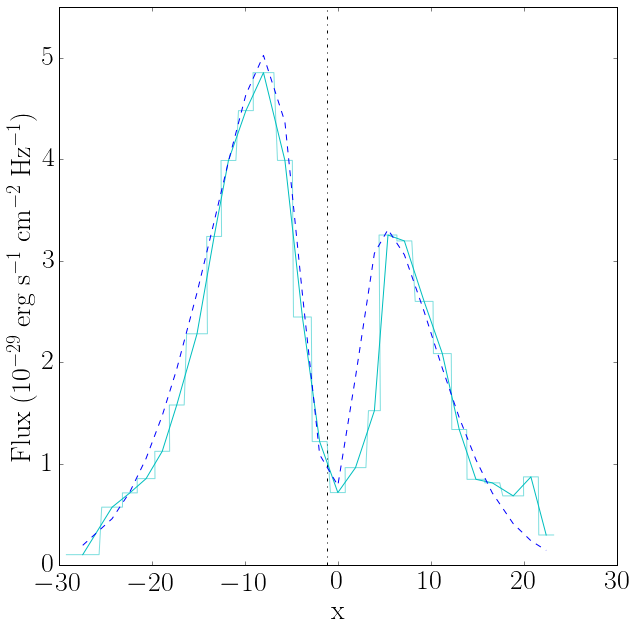

In [10]:
f = figure(figsize = (10,10))
plot(x_x, y_x, c='c', alpha=0.5)
plot(x_xp, y_xp, c='c')
plot(x_x_fit0, y_x_fit0, c='b', linestyle='--')
vlines(x_x[half],0,5.5,linestyle='-.')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
ylim(0,5.5)

Mean acceptance fraction: 0.233
amplitude_neg =  (50.374793658481195, 9.4515291429342483, 9.077243806424427)
center_neg =  (-2.7649610455868725, 1.9579208135436541, 2.2960524172183741)
sigma_neg =  (13.800488268707422, 3.6962631888034387, 2.6743920767823823)
gamma_neg =  (-0.37486484362478201, 0.25854637131588354, 0.90889435753295855)
amplitude_pos =  (71.931067075837319, 79.229090783023736, 49.702112044463604)
center_pos =  (4.7637073226591253, 3.6126954170875658, 3.4133615514032298)
sigma_pos =  (13.600683512984423, 10.469007332097705, 8.8554464225064482)
gamma_pos =  (7.7093544094961333, 5.1448237634968832, 5.2298891162547303)


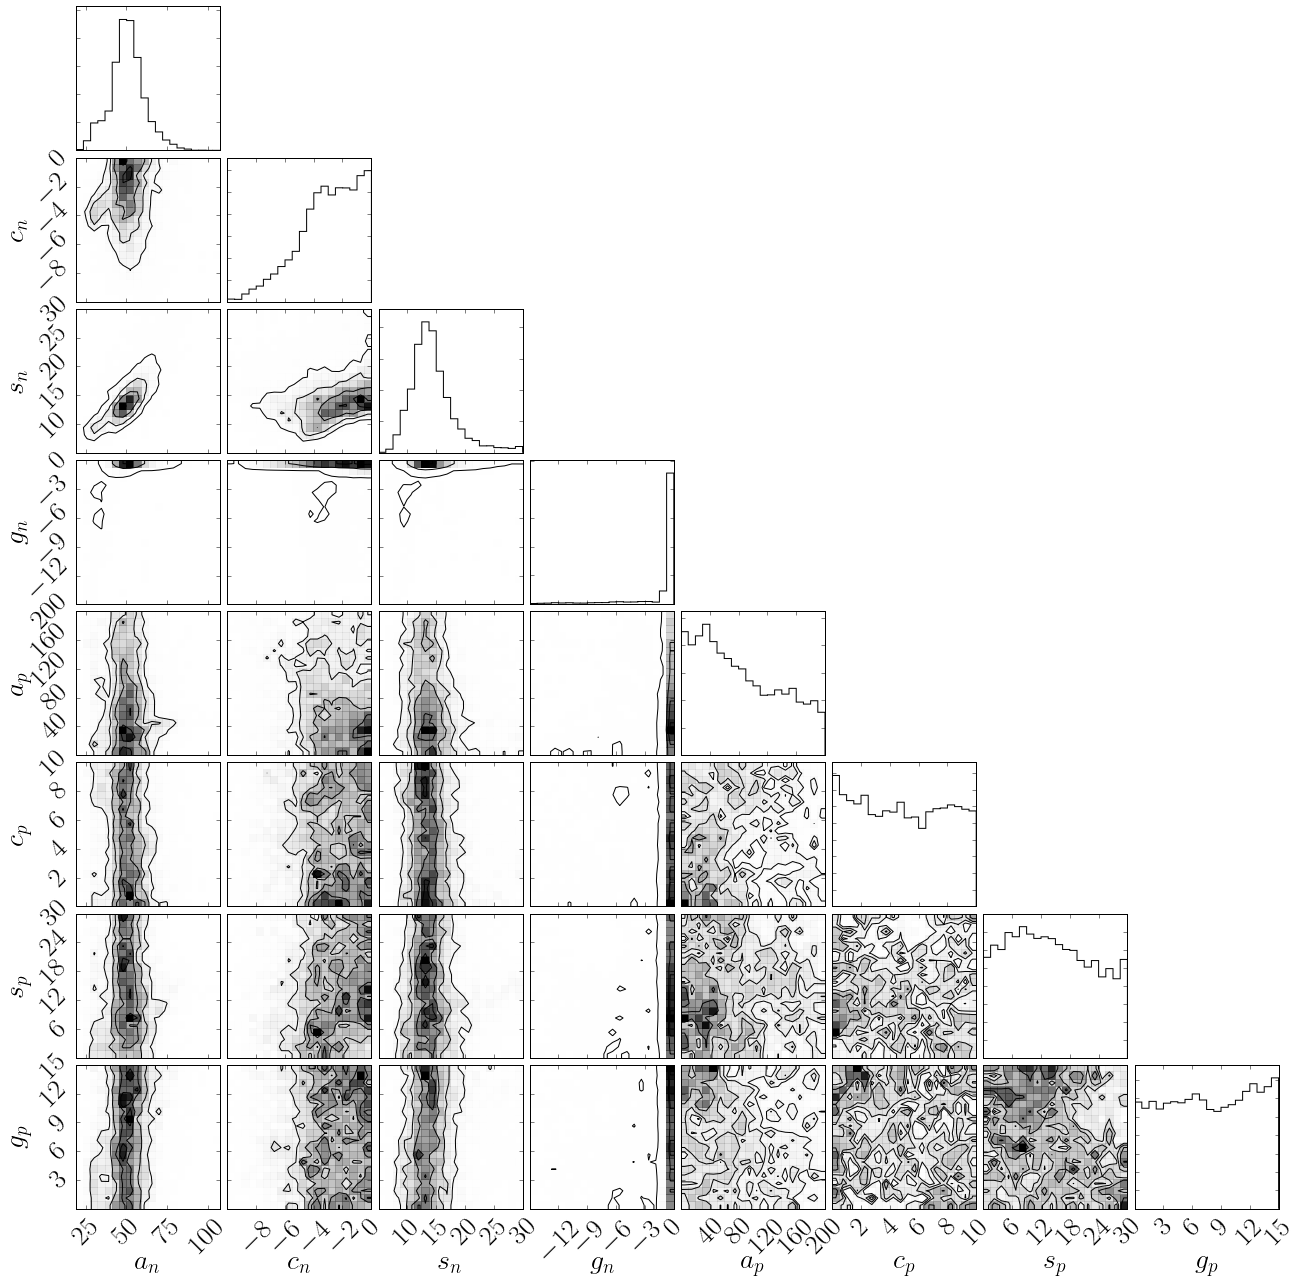

In [11]:
amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos = emcee_skewed_gaussian(x_xp, y_xp)

In [12]:
x_x_fit = x_xp
y_x_fit = sum_2_skewed_gaussian(x_x_fit, amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos)

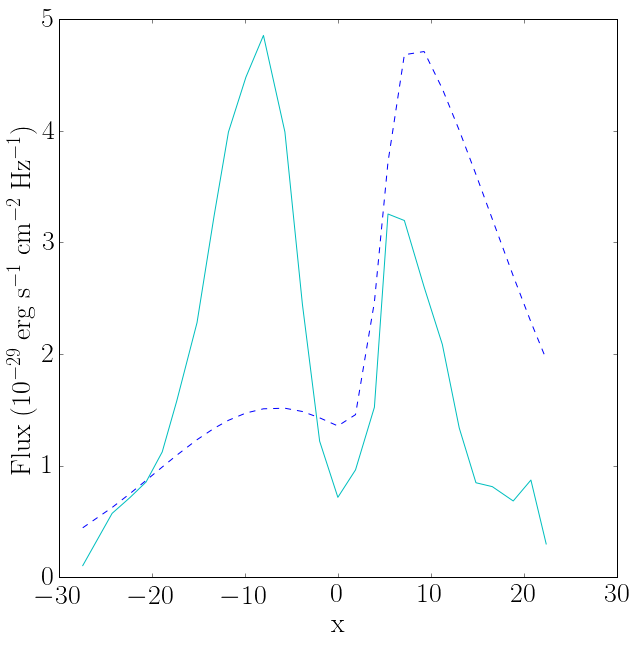

In [13]:
f = figure(figsize = (10,10))
plot(x_xp, y_xp, c='c')
plot(x_x_fit, y_x_fit, c='b', linestyle='--')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('gaussian_fit_kulas.png')

In [14]:
gaussian_fit_file = open('gaussian_fit_kulas.dat','w')
gaussian_fit_file.write('amplitude_neg\tsigma_neg\tcenter_neg\tgamma_neg\tamplitude_pos\tsigma_pos\tcenter_pos\tgamma_pos\n')
gaussian_fit_file.write(str(amplitude_neg)+'\t'+str(sigma_neg)+'\t'+str(center_neg)+'\t'+str(gamma_neg)+'\t'+str(amplitude_pos)+'\t'+str(sigma_pos)+'\t'+str(center_pos)+'\t'+str(gamma_pos))
gaussian_fit_file.close()

In [15]:
print (1.0/2.0)*sum((y_xp-y_x_fit0)**2)
print (1.0/2.0)*sum((y_xp-y_x_fit)**2)

2.28820225924
41.0489451987
